In [4]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
#from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
#import cv2
from matplotlib import pyplot as plt


In [5]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/mango-diseases')

Found 32550 files belonging to 16 classes.


2023-01-08 06:04:27.642243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-08 06:04:27.642293: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-08 06:04:27.642319: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (228dac2a6355): /proc/driver/nvidia/version does not exist
2023-01-08 06:04:27.642870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
data = data.map(lambda x,y: (x/255, y))
sclaed_itarator = data.as_numpy_iterator()
batch = sclaed_itarator.next()

In [7]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
test_size

101

In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

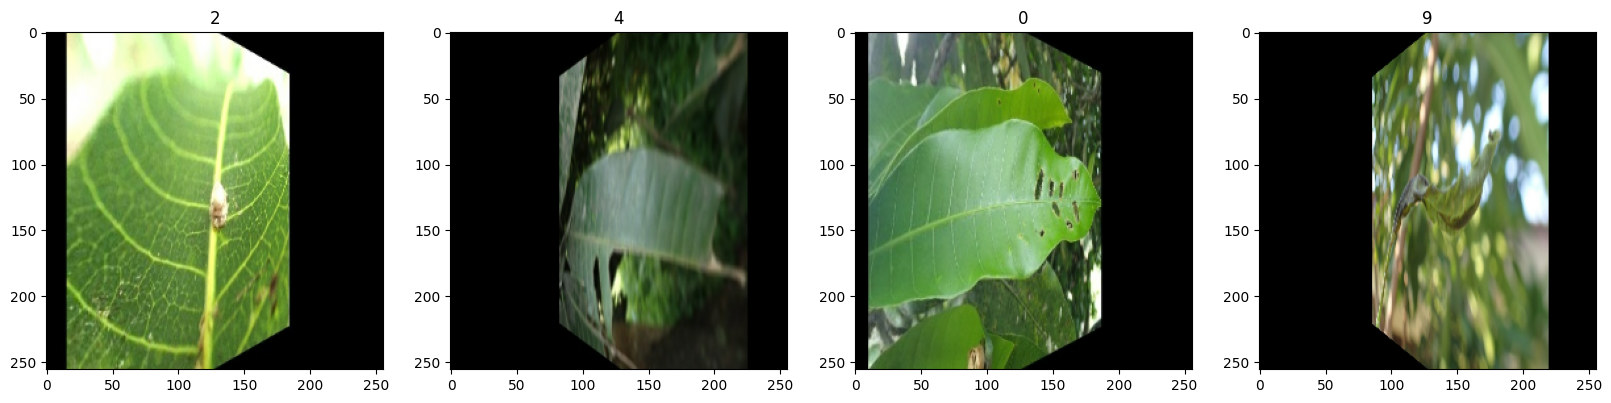

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [10]:
cnn = Sequential()

cnn.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, (3,3), 1, activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(16, (3,3), 1, activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(16, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [11]:
cnn.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics =['accuracy'])

In [12]:
history = cnn.fit_generator(train,
                              epochs=5,
                              verbose=1,
                              validation_data=val,
                              )


Epoch 1/5


/tmp/ipykernel_12/3566272188.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(train,


814/814 [==============================] - 217s 265ms/step - loss: 0.8597 - accuracy: 0.7364 - val_loss: 0.3022 - val_accuracy: 0.9033
Epoch 2/5
814/814 [==============================] - 216s 265ms/step - loss: 0.1880 - accuracy: 0.9441 - val_loss: 0.2753 - val_accuracy: 0.9190
Epoch 3/5
814/814 [==============================] - 216s 265ms/step - loss: 0.0945 - accuracy: 0.9710 - val_loss: 0.1965 - val_accuracy: 0.9480
Epoch 4/5
814/814 [==============================] - 217s 267ms/step - loss: 0.0629 - accuracy: 0.9797 - val_loss: 0.2372 - val_accuracy: 0.9478
Epoch 5/5
814/814 [==============================] - 216s 265ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.1618 - val_accuracy: 0.9623


In [13]:
train_size

814

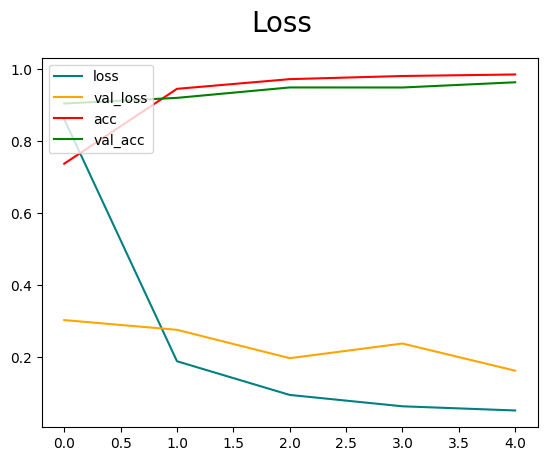

In [14]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss' )
plt.plot(history.history['accuracy'], color='red', label='acc', )
plt.plot(history.history['val_accuracy'], color='green', label='val_acc', )

fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [19]:
resize = tf.image.resize(img, (256,256))


In [ ]:
np.array(yhat.max())

In [ ]:
idx = np.where(yhat == yhat.max())[1][0]
idx

In [16]:
from tensorflow.keras.models import load_model
cnn.save(os.path.join('models','cornMLFinal.h5'))

In [17]:
new_model = load_model('/kaggle/working/models/cornMLFinal.h5')


In [20]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 125ms/step


array([[0.05871809, 0.06967098, 0.05509154, 0.06306155, 0.07168569,
        0.12540168, 0.0624385 , 0.06635875, 0.06776615, 0.0472536 ,
        0.05344556, 0.05501411, 0.05134672, 0.06566001, 0.0519716 ,
        0.03511543]], dtype=float32)

In [24]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


In [22]:
test = tf.keras.utils.image_dataset_from_directory('/kaggle/input/images-of-mango-leaves/pest_classification/test')

KeyboardInterrupt: 

In [26]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat1 = new_model.predict(X)
    temp = []
    for i in yhat1:
        temp.append(i.max())
    pre.update_state(y, temp)
    re.update_state(y, temp)
    acc.update_state(y, yhat1)
#     print(y, yhat)
#     print(y, temp)
#     print(y, temp)


1/1 [==============================] - 0s 35ms/step


In [31]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8888889, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
